## \#1

The bloodstream concentration of a drug, measured hourly after admin-
istration, is given in the accompanying table. $\\$ (a) Fit the model $y = c_1te^{c_2t}\text{.} \\$ (b) Find the estimated maximum concentration using the found model. $\\$ (c) Use a root-finding method to estimate the half-life. $\\$ (d) Suppose that the therapeutic ranfe for the drug is 4-15ng/ml. Use the equation solver of your choice to estimate the time the drug concentration stays within therapeutic levels. 

hour concentration (ng/ml) $\\$
1 6.2 $\\$
2 9.5 $\\$
3 12.3 $\\$
4 13.9 $\\$
5 14.6 $\\$
6 13.5 $\\$
7 13.3 $\\$
8 12.7 $\\$
9 12.4 $\\$
10 11.9

Note: “Half-life in the context of medical science typically refers to the elimination half-life. The definition of elimination half-life is the length of time required for the concentration of a particular substance (typically a drug) to decrease to half of its starting dose in the body.” (Reference: National Library of Medicine). For the purpose of this math exercise, we assume the starting dose to be the maximum concentration.

a) For an exponential model like the one posed in this problem, we first have to transform the model into applicable for the least squares method. Taking the natural log of both sides yields:
$ \\ \text{ln}(y) = \text{ln}(c_1te^{c_2t}) = \text{ln}(c_1t) + c_2t =  \text{ln}c_1 + \text{ln}(t) + c_2t = k + \text{ln}(t) + c_2t, \text{ where } k = \text{ln}c_1\\$
Since ln(t) doesn't rely on either of the unknown constants we're solving for, we can subtract the values from ln(y) when creating the vector for b.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set number of observations
n = 10

# introduce data and time vector (used for calculating matrix coefficients later)
concentration = np.array([6.2, 9.5, 12.3, 13.9, 14.6, 13.5, 13.3, 12.7, 12.4, 11.9])
hour = np.arange(1, n+1)

# number of unkowns - 2
c = np.zeros(2) # vector for k, c_2
m = 2 # used in creating matrix (A)

# create the matrix of coefficients (A)
A = np.column_stack((np.ones(n), hour))

# vector for observations - accounting for taking ln of both sides
b = np.log(concentration) - np.log(hour)

# finding least squares using the normal equation
c = np.linalg.solve(A.T @ A, A.T @ b)

# do inverse of ln to get values for c1
c[0] = np.exp(c[0])
print(c)

[ 7.12202597 -0.18384897]


Max estimated concentration: 14.202035125109116


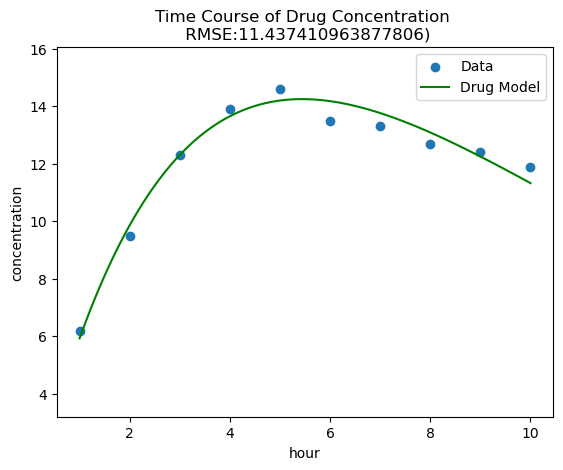

In [6]:
# Calculate the predicted values
y_pred = c[0] * hour * np.exp(c[1] * hour)

# Plot the data points
plt.scatter(hour, concentration, label='Data')

# Plot the model
x = np.linspace(hour[0], hour[-1], 100)
y_ = c[0]*x*np.exp(c[1]*x)
plt.plot(x, y_, color='green', label='Drug Model')

# Set labels and title
plt.xlabel('hour')
plt.ylabel('concentration')
plt.title(f'Time Course of Drug Concentration')
plt.ylim(np.min(concentration)-3, np.max(concentration)*1.1)

# Show legend
plt.legend()

# Show the plot
plt.show()

b) With the moodel calculated using the least squares method, we can estimate the maximum concentration using np.max(). Analytically, it can be shown that the maximum concentration occurs at $t = -\frac{1}{c_2} = 5.43924722559$. Using the fit model, the maximum concentration is about 14.251

In [10]:
print(np.max(y_pred))

14.202035125109116


c) We'll use Newton's method to approximate the half-life by finding the root of $y(t) = c_1te^{c_2t} - 3.1$. To improve convergence speed, we'll start at t = 8.

In [8]:
# function inspired by Park's 104A code
def Newton_Method(f, fp, initial, tol = 1e-8, max_iter = 30):
    '''
    Newton's method for root-finding
    Inputs:
    f: function
    fp: function's derivative
    initial: initial point to begin iteration
    tol: desired tolerance for error (loop will break if difference < tol)
    max_iter: maximum # of iterations if tolerance level never broken
    Output:
    root - root approximation
    '''
    x = initial
    for i in range(max_iter):
        x_ = x 
        x = x - f(x)/fp(x)

        if np.abs(x - x_) < tol:
            break
    
    return x

In [11]:
# create parameters
f = lambda x: c[0]*x*np.exp(c[1]*x) - 3.1
fp = lambda x: c[0]*(c[1]*x*np.exp(c[1]*x) + np.exp(c[1]*x))
initial = 8

half_life = Newton_Method(f, fp, initial)
print(half_life)

21.113554603836022


d) Since the initial concentration is more than 4 and the concentration is never more than 15, we can find the time where the concentration deteriorates to 4 (like the root-finding problem in part c) to determine the time range for therapeutic levels.

In [12]:
# create new function
f = lambda x: c[0]*x*np.exp(c[1]*x) - 4

t_therapeutic = Newton_Method(f, fp, initial)
print(t_therapeutic)

19.21447694093016


## \#2
(a) Apply the classical Gram-Schmidt process to find a orthogonal basis $\{q_i\}_{i=1}^3$ such that $\text{span}\{w_i\}_{i=1}^3 = \text{span}\{q_i\}_{i=1}^3$ for $j = 1,2,3,$ where $w_1 = (1,-1,1,-1), w_2 = (1,1,3,-1), w_3 = (-3,7,1,3)$. Can skip normalization step $\\$
(b) Check answer some other way

In [24]:
def Gram_Schmidt(A):
    """     
    Returns an array of column vectors that are pairwise orthogonal
    Input: 
        A - array, matrix of vectors to perform GS on
    Output: 
        Q - array, matrix of orthogonal vectors that span the same space 
        R - array, matrix of coefficients from decomposition
    """

    (m, n) = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        y = A[:, j].copy()
        
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], y)
            y = y - R[i, j] * Q[:, i]

        R[j, j] = np.linalg.norm(y)
        Q[:, j] = y / R[j, j]
    
    return Q, R

In [25]:
A = np.array([[1,-1,1,-1],[1,1,3,-1],[-3,7,1,3]], dtype=np.float64)

A = A.T

Q = Gram_Schmidt(A)[0]
print(Q)

[[ 0.5         0.          0.        ]
 [-0.5         0.70710678  0.70710678]
 [ 0.5         0.70710678  0.70710678]
 [-0.5         0.          0.        ]]


We can see from the output of Q that the last two vectors are the same. Computing the orthonormal basis by hand, we see that a solution for $\{q_i\}_{i=1}^3$ is $\{(1/2, -1/2, 1/2, -1/2),(0, 2, 2, 0), (0, 0, 0, 0)\}$. The fact that the zero vector is a part of the orthonormal vectors that span the same space suggests that the original set of vectors are linearly dependent. Using trial and error shows that $5w_1 - 2w_2 + w_3 = \vec{0}$, so both spanning spaces will only be of dimension two.

## \#3

Apply classical Gram-Schmidt and modified Gram-Schmidt method to or-
thogonalize the 4 × 3 matrix: $\\ \begin{bmatrix} 1 & 1 & 1 \\ \delta & \delta/2 & \delta/3 \\ \delta/2 & \delta/3 & \delta/4 \\ \delta/3 & \delta/4 & \delta/5 \end{bmatrix} \\$
where $\delta = 10^{-10}$. Compare the accuracy of the results by computing $Q^TQ$ for each method.

In [27]:
d = 10e-10

A = np.array([[1, d, d/2, d/3],[1, d/2, d/3, d/4],[1, d/3, d/4, d/5]])

# transpose matrix 
A = A.T

# finding Q using Gram Schmidt
Q = Gram_Schmidt(A)[0]

# check Q via Q^T * Q
print(Q.T @ Q)


[[ 1.00000000e+00 -1.14527425e-09 -2.20872348e-10]
 [-1.14527425e-09  1.00000000e+00 -2.49475840e-15]
 [-2.20872348e-10 -2.49475840e-15  1.00000000e+00]]


To perform full QR factorization, we just need to pad A with the fourth standard basis vector. Then we can just reuse the Gram Schmidt function used in reduced QR. 

In [30]:
(m, n) = A.shape

# create identity of corresponding size and update with vectors from A
A_ = np.eye(m)
A_[:, :n] = A

# use Gram Schmidt function with A_ to get Q_
Q_ = Gram_Schmidt(A_)[0]

# check Q_ the same way as before
print(Q_.T @ Q_)

[[ 1.00000000e+00 -1.14527425e-09 -2.20872348e-10 -4.02224454e-10]
 [-1.14527425e-09  1.00000000e+00 -2.49475840e-15 -1.89238044e-15]
 [-2.20872348e-10 -2.49475840e-15  1.00000000e+00  2.23173971e-16]
 [-4.02224454e-10 -1.89238044e-15  2.23173971e-16  1.00000000e+00]]


The accuracy of results are about the same. The accuracy of the 4th column of Q_ is stronger than the accuracy of the other columns (which are similar to that of Q) which suggests full QR factorization has better accuracy.

## \#4

Compute the QR factorization and use it to solve the least squares problem.
$ \begin{bmatrix} 1 & 4 \\ -1 & 1 \\ 1 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 3 \\ 1 \\ 1 \\ -3 \end{bmatrix}$

In [38]:
# create A and b
A = np.array([[1,4],[-1,1],[1,1],[1,0]])
b = np.array([3,1,1,-3])

# create padded matrix to perform full QR factorization
(m, n) = A.shape
A_ = np.eye(m)
A_[:, :n] = A

# full QR factorization
Q, R = Gram_Schmidt(A_)

# extract necessary data
R_ = R[:n, :n]
d_ = (Q.T @ b)[:n]

# find LS solution
x = np.linalg.solve(R_, d_)
print(x)

[-1.  1.]
